In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import gridspec
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})

In [2]:
path = '../Data/SAXS/Longer Bridge/'
filenames = os.listdir(path)
data_20_bridge = np.load(path + 'Bridge_20.npy')
data_40_bridge = np.load(path + 'Bridge_40.npy')
data_80_bridge = np.load(path + 'Bridge_80.npy')
sphere_polydisperse = np.loadtxt(path + 'sasmodels_sphere_fit.txt', skiprows=1)

In [3]:
simulation_20 = np.load('../Data/Simulations/Bridge 20/Sample_24_Best_Sample/Density_0.00323_U_0_100.0_r0_2.13904_n_16.98738/scattering_data/average_scattering_curve.npy')

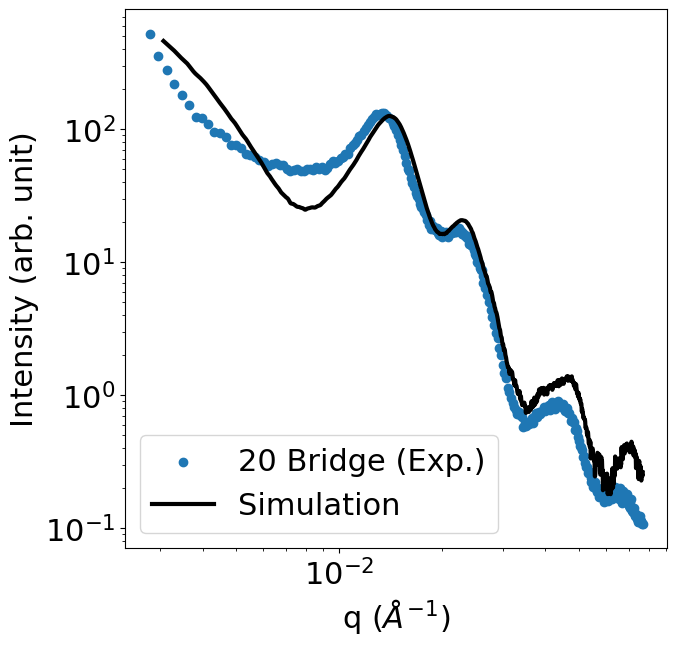

In [4]:
fig, ax = plt.subplots(figsize=(7,7))
plt.scatter(data_20_bridge[:-200,0], data_20_bridge[:-200,1], color = 'C0', label = '20 Bridge (Exp.)')
#plt.scatter(data_40_bridge[:,0], data_40_bridge[:,1], color = 'green', label = '40 Bridge')
#plt.scatter(data_80_bridge[:,0], data_80_bridge[:,1], color = 'black', label = '80 Bridge')
plt.plot(simulation_20[:,0], simulation_20[:,1]*2.8e-1, linewidth = 3, color='k', label = 'Simulation')

plt.xscale('log')
plt.yscale('log')
plt.ylabel('Intensity (arb. unit)')
plt.xlabel('q ($\\AA^{-1}$)')
plt.legend()
#plt.savefig('../Figures/Simulation_vs_exp_20.png', dpi=600, bbox_inches="tight")

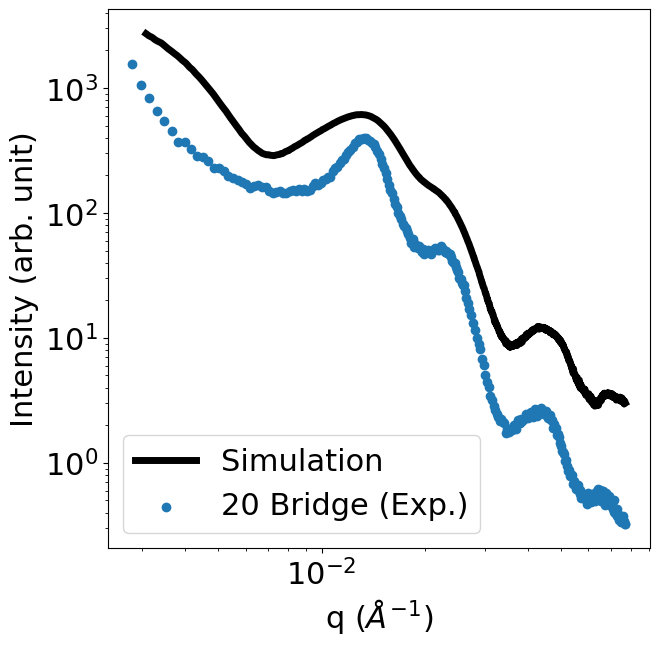

In [5]:
path = '../Data/Simulations/Bridge 20/'
filenames = sorted(os.listdir(path))
fig, ax = plt.subplots(figsize=(7,7))


i = 5
filenames2 = sorted(os.listdir(path + filenames[i]))[1]
data = np.load(path + '/' + filenames[i] + '/' + filenames2 + '/scattering_data/average_scattering_curve.npy')
plt.plot(data[:,0], data[:,1], linewidth = 5, color='k', label = 'Simulation')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Intensity (arb. unit)')
plt.xlabel('q ($\\AA^{-1}$)')
plt.scatter(data_20_bridge[:-200,0], data_20_bridge[:-200,1]*3e0, color = 'C0', label = '20 Bridge (Exp.)')
plt.legend()
#plt.savefig('../Figures/all_simulations_compare.png', dpi=600, bbox_inches="tight")

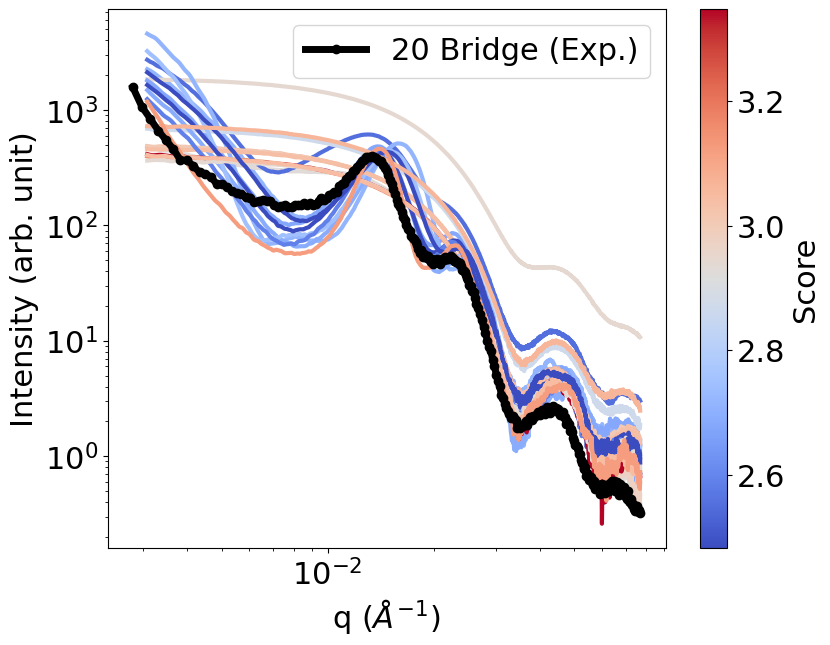

In [7]:
path = '../Data/Simulations/Bridge 20/'
filenames = sorted(os.listdir(path))

score_lst = []
for i in range(len(filenames)):
    filenames2 = sorted(os.listdir(path + filenames[i]))[1]
    filenames3 = sorted(os.listdir(path + filenames[i]))[-2]
    try:
        score = pd.read_csv(path + '/' + filenames[i] + '/' + filenames3).values[0][0]
        score_lst.append(score)
    except:
        print()

frames = len(score_lst)
cmap = cm.coolwarm
norm = plt.Normalize(np.min(score_lst), np.max(score_lst))
fig, ax = plt.subplots(figsize=(9,7))

for i in range(len(filenames)):
    filenames2 = sorted(os.listdir(path + filenames[i]))[1]
    filenames3 = sorted(os.listdir(path + filenames[i]))[-2]
    data = np.load(path + '/' + filenames[i] + '/' + filenames2 + '/scattering_data/average_scattering_curve.npy')
    try:
        score = pd.read_csv(path + '/' + filenames[i] + '/' + filenames3).values[0][0]
        plt.plot(data[:,0], data[:,1], linewidth = 3, color=cmap(norm(score)))
    except:
        print()
    
    plt.xscale('log')
    plt.yscale('log')
    plt.ylabel('Intensity (arb. unit)')
    plt.xlabel('q ($\\AA^{-1}$)')
plt.plot(data_20_bridge[:-200,0], data_20_bridge[:-200,1]*3e0, color = 'k', label = '20 Bridge (Exp.)', linewidth = 5, marker='o')
plt.legend()
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Score')
#plt.savefig('../Figures/all_simulations.png', dpi=600, bbox_inches="tight")

In [8]:
path = '../Data/Simulations/Bridge 20/'
filenames = sorted(os.listdir(path))

for i in range(len(filenames)):
    filenames2 = sorted(os.listdir(path + filenames[i]))[1]
    filenames3 = sorted(os.listdir(path + filenames[i]))[-1]
    filenames4 = sorted(os.listdir(path + filenames[i]))[-2]
    try:
        input_params = pd.read_csv(path + '/' + filenames[i] + '/' + filenames3).values.reshape(1,-1)
        score = pd.read_csv(path + '/' + filenames[i] + '/' + filenames4).values[0][0]
        if i == 0:
            input_params_all = input_params
        else:
            input_params_all = np.vstack((input_params_all, input_params))
    except:
        print()

In [9]:
def modified_LJ(r, rmin, rmax, U_0, n, m, r0):
    U = U_0/(n - m) * (m*(r0/r)**n - n*(r0/r)**m)
    F = U_0*m*n*((r0/r)**n - (r0/r)**m)/((n-m)*r)
    return U, F

r0 = 2.13
rmin = 0.75*r0
rmax = 5
m = 12
width = 1000
U_0 = 100
n = 16.98
r_vals = np.linspace(rmin, rmax, width)
U, F = modified_LJ(r_vals, rmin, rmax, U_0, n, m, r0)

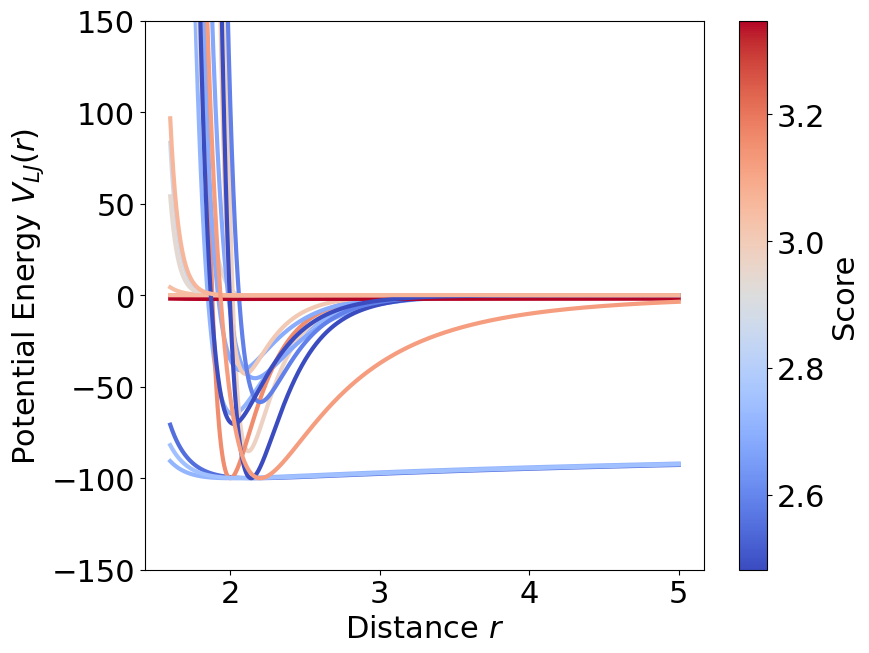

In [10]:
frames = len(score_lst)
cmap = cm.coolwarm
norm = plt.Normalize(np.min(score_lst), np.max(score_lst))
fig, ax = plt.subplots(figsize=(9,7))

for i in range(input_params_all.shape[0]):
    params = input_params_all[i, :]
    U_0 = params[1]
    n = params[3]
    r0 = params[2]

    U, F = modified_LJ(r_vals, rmin, rmax, U_0, n, m, r0)

    plt.plot(r_vals, U, label=f'LJ-nm: n={n}, m={m}, r₀={r0}, U_0={U_0}', linewidth = 3, color=cmap(norm(score_lst[i])))
    plt.xlabel("r")
    plt.ylabel("Potential Energy $V_{LJ}(r)$")
    plt.xlabel('Distance $r$')
    plt.ylim([-150, 150])
    plt.tight_layout()

sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) 
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Score')
#plt.savefig("../Figures/potential_plot_2.png", dpi=600, bbox_inches="tight")